In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
population_df = pd.read_excel('Population.xlsx',
                              sheet_name='Data',
                              skiprows=[0],
                              headers=1,
                              usecols=['Location', 'Age','Female','Male'],
                              converters={'Location': lambda x: x.strip(),
                                             'Female': int,
                                             'Male': int})

In [3]:
population_df = population_df[population_df.Location !='Geographic regions']
population_df

,Location,Age,Female,Male
0,World,0-4,328509,349433
1,World,5-9,321512,342928
2,World,10-14,309770,331497
3,World,15-19,295554,316642
4,World,20-24,289101,308287
...,...,...,...,...
143,Oceania,80-84,357,302
144,Oceania,85-89,233,166
145,Oceania,90-94,119,68
146,Oceania,95-99,35,14


In [4]:
df = population_df.melt(id_vars=['Location', 'Age'],value_name='Population', var_name="Sex")
df

,Location,Age,Sex,Population
0,World,0-4,Female,328509
1,World,5-9,Female,321512
2,World,10-14,Female,309770
3,World,15-19,Female,295554
4,World,20-24,Female,289101
...,...,...,...,...
289,Oceania,80-84,Male,302
290,Oceania,85-89,Male,166
291,Oceania,90-94,Male,68
292,Oceania,95-99,Male,14


In [8]:
df = df[df.Location=='World']

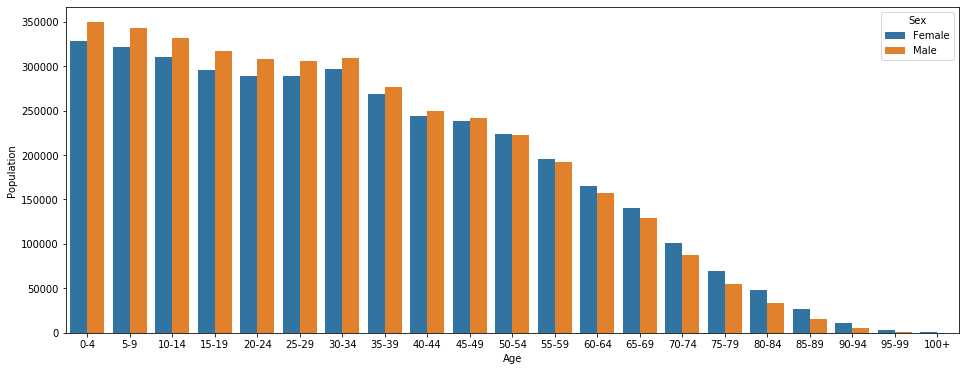

In [10]:
plt.figure(figsize=(16,6))
sns.barplot(x="Age",y="Population", hue="Sex", data = df)


In [14]:
df=df.iloc[::-1]
df

,Location,Age,Sex,Population
167,World,100+,Male,124
166,World,95-99,Male,1078
165,World,90-94,Male,5328
164,World,85-89,Male,15757
163,World,80-84,Male,33649
162,World,75-79,Male,54755
161,World,70-74,Male,87186
160,World,65-69,Male,128939
159,World,60-64,Male,157180
158,World,55-59,Male,192215


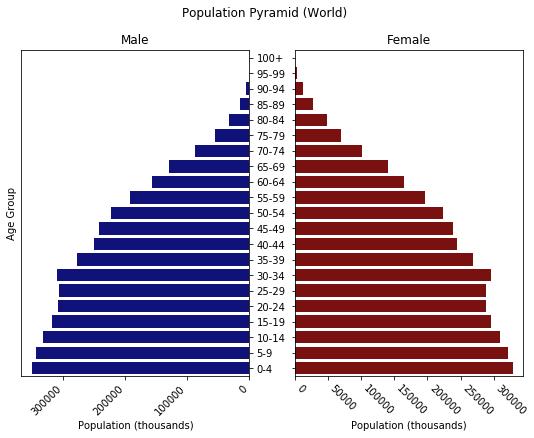

In [35]:
# Create two subplots with shared y-axis
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))
 
# Bar chart for male
sns.barplot(x="Population",
            y="Age",
            color="darkblue",
            ax=axes[0],
            data = df[(df.Sex == 'Male')])
# Bar chart for female
sns.barplot(x="Population",
            y="Age",
            color="darkred",
            ax=axes[1],
            data = df[(df.Sex == 'Female')])
 
# Use Matplotlib function to invert the first chart
axes[0].invert_xaxis()


# Use Matplotlib function to show tick labels in the middle
axes[0].yaxis.tick_right()
 
# Use Matplotlib functions to label the axes and titles
axes[0].set_title("Male")
axes[1].set_title("Female")
axes[0].set(xlabel="Population (thousands)", ylabel="Age Group")
axes[1].set(xlabel="Population (thousands)", ylabel="")
# axes[0].set_xticklabels(xticklabels, rotation = 45, ha="right")
# axes[1].set_xticklabels(xticklabels, rotation = 315, ha="left")

plt.setp(axes[0].get_xticklabels(), ha="right", rotation=45)
plt.setp(axes[1].get_xticklabels(), ha="left", rotation=315)


fig.suptitle("Population Pyramid (World)")
 
# Show the figure
plt.show()